TIC TAC TOE DATASET

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [ ]:
# Import dataset
ticTacToeDf = pd.read_csv('tic-tac-toe.csv')
ticTacToeDf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      958 non-null    int64 
 1   'top-left-square'       958 non-null    object
 2   'top-middle-square'     958 non-null    object
 3   'top-right-square'      958 non-null    object
 4   'middle-left-square'    958 non-null    object
 5   'middle-middle-square'  958 non-null    object
 6   'middle-right-square'   958 non-null    object
 7   'bottom-left-square'    958 non-null    object
 8   'bottom-middle-square'  958 non-null    object
 9   'bottom-right-square'   958 non-null    object
 10  'Class'                 958 non-null    object
dtypes: int64(1), object(10)
memory usage: 82.5+ KB


In [ ]:
ttt_X = ticTacToeDf.iloc[:, 0:9].values
ttt_y = ticTacToeDf.iloc[:, 9:10].values

In [ ]:
le = LabelEncoder()
for col in ticTacToeDf.columns:
    ticTacToeDf[col] = le.fit_transform(ticTacToeDf[col])

ttt_X=ticTacToeDf.iloc[:,:-1].values

# Onehot encode all dependent categorical variables
onehotencoder = OneHotEncoder()
ttt_X = onehotencoder.fit_transform(ttt_X).toarray()


CAR EVALUATION DATASET

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

dataset = pd.read_csv('car_evaluation.csv', names=col_names)

X=dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values
dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: >

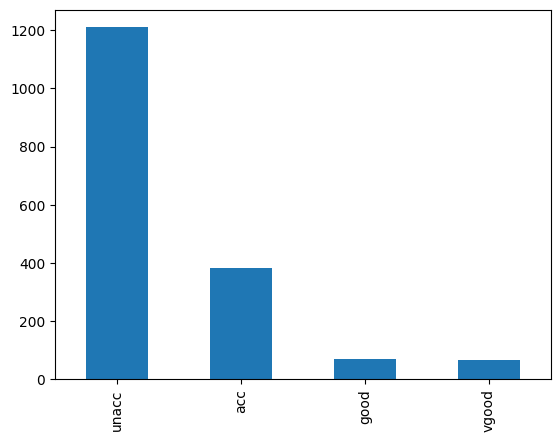

In [ ]:
dataset['class'].value_counts().plot(kind="bar")

In [ ]:
feature_names = list(dataset.columns.values[:-1])
for feature in feature_names:
    unique_count = dataset[feature].nunique()
    unique_vals = dataset[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying: 4 values, ['vhigh' 'high' 'med' 'low']
maint: 4 values, ['vhigh' 'high' 'med' 'low']
doors: 4 values, ['2' '3' '4' '5more']
persons: 3 values, ['2' '4' 'more']
lug_boot: 3 values, ['small' 'med' 'big']
safety: 3 values, ['low' 'med' 'high']


In [ ]:
label_name = dataset.columns.values[-1]
print("{}: {} values, {}".format(label_name, dataset[label_name].nunique(), dataset[label_name].unique()))
dataset[label_name].value_counts()


class: 4 values, ['unacc' 'acc' 'vgood' 'good']


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
dataset=dataset.iloc[:,:-1]
dataset.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:
print(dataset['buying'])

0       vhigh
1       vhigh
2       vhigh
3       vhigh
4       vhigh
        ...  
1723      low
1724      low
1725      low
1726      low
1727      low
Name: buying, Length: 1728, dtype: object


In [ ]:
label_encoder = LabelEncoder()
for column in dataset.columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

scaler = StandardScaler()
data_encoded = scaler.fit_transform(dataset)


PCA

In [ ]:
from sklearn.decomposition import PCA
ttt_pca = PCA(n_components=9)
ttt_pca.fit(ttt_X)
ttt_pca.transform(ttt_X)
ttt_pca.explained_variance_ratio_

array([0.07759232, 0.07437345, 0.07437345, 0.07305997, 0.06797565,
       0.06581133, 0.04620472, 0.04403313, 0.04403313])

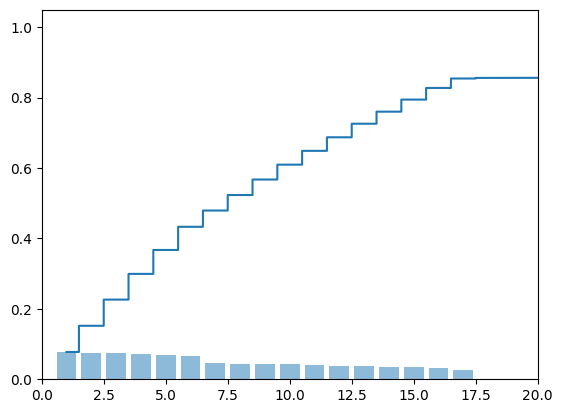

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(1, ttt_pca.n_components_ + 1), ttt_pca.explained_variance_ratio_,
        align='center', alpha=0.5, label='Individual explained variance')
plt.step(range(1, ttt_pca.n_components_ + 1), np.cumsum(ttt_pca.explained_variance_ratio_),
        where='mid', label='Explained variance cumulative')
plt.xlim([0, 20])
plt.show()

Text(0.5, 0, 'Number of components')

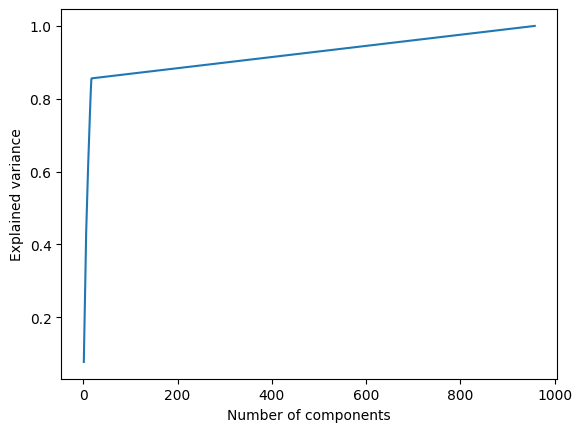

In [ ]:
plt.plot(range(1, ttt_pca.n_components_ + 1), np.cumsum(ttt_pca.explained_variance_ratio_))
plt.ylabel('Explained variance')
plt.xlabel('Number of components')


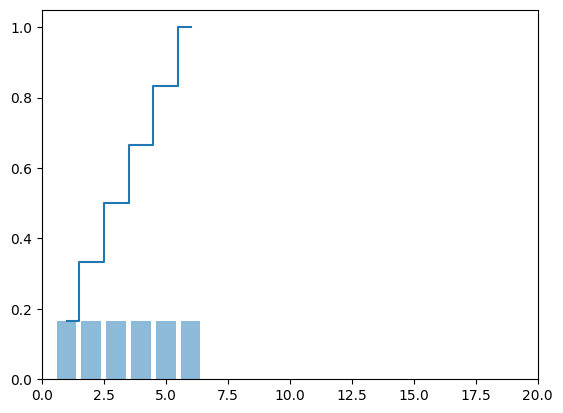

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data_encoded)
pca.transform(data_encoded)

plt.bar(range(1, pca.n_components_ + 1),pca.explained_variance_ratio_,
        align='center', alpha=0.5, label='Individual explained variance')
plt.step(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_),
        where='mid', label='Explained variance cumulative')
plt.xlim([0, 20])
plt.show()

In [ ]:
pca.explained_variance_ratio_


array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

Text(0.5, 0, 'Number of components')

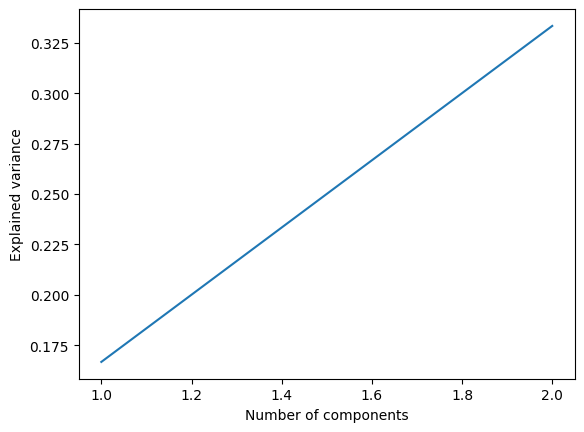

In [ ]:
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained variance')
plt.xlabel('Number of components')

ICA

In [ ]:
from sklearn.decomposition import FastICA
from scipy.stats import describe, kurtosis

ica = FastICA(
    n_components=10,
    random_state=0,
    max_iter=400,
)
ttt_x_tr = ica.fit_transform(ttt_X)
kurt_df = pd.DataFrame(kurtosis(ttt_x_tr, axis=0), columns=['kurtosis'])
kurt_df.sort_values(by='kurtosis', ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


,kurtosis
1,-0.880883
0,-1.004603
4,-1.185643
3,-1.188955
5,-1.201923
6,-1.226422
9,-1.247887
7,-1.257559
2,-1.276447
8,-1.712787


In [ ]:
component_counts = np.hstack((
    np.arange(1, 10),
    np.arange(10, 21, 2),
    np.array([30, 40, 50, 60, 70, 80, 90, 100]),
)).astype(np.int)
total_kurtosis = {}

for component_count in component_counts:
    tmp_ica = FastICA(
        random_state=0,
        n_components=component_count,
    )
    tmp_X_tr = tmp_ica.fit_transform(ttt_X)
    total_kurtosis[component_count] = np.abs(kurtosis(tmp_X_tr, axis=0)).sum()


<ipython-input-52-c8e8afc712c0>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  )).astype(np.int)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Start

[]

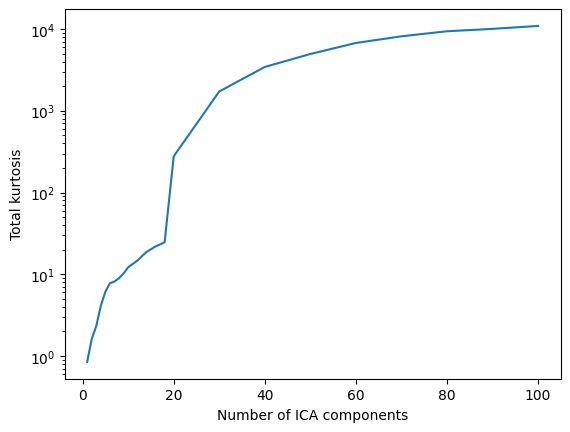

In [ ]:
pd.Series(total_kurtosis).plot()
plt.ylabel('Total kurtosis')
plt.xlabel('Number of ICA components')
plt.semilogy()

In [ ]:
ica = FastICA(
    n_components=10,
    random_state=0,
    max_iter=400,
)
x_tr = ica.fit_transform(data_encoded)
kurt_df = pd.DataFrame(kurtosis(x_tr, axis=0), columns=['kurtosis'])
kurt_df.sort_values(by='kurtosis', ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:589: UserWarning: n_components is too large: it will be set to 6
  warnings.warn(


,kurtosis
2,-1.36
0,-1.36
1,-1.36
4,-1.50
3,-1.50
5,-1.50


<ipython-input-57-1d5b86673524>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  )).astype(np.int)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Start

[]

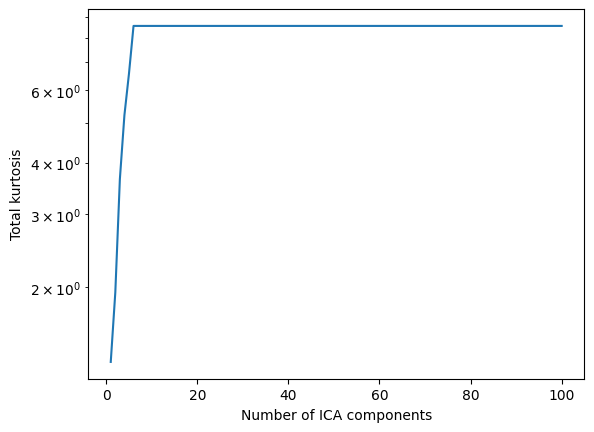

In [ ]:
component_counts = np.hstack((
    np.arange(1, 10),
    np.arange(10, 21, 2),
    np.array([30, 40, 50, 60, 70, 80, 90, 100]),
)).astype(np.int)
total_kurtosis = {}

for component_count in component_counts:
    tmp_ica = FastICA(
        random_state=0,
        n_components=component_count,
    )
    tmp_X_tr = tmp_ica.fit_transform(data_encoded)
    total_kurtosis[component_count] = np.abs(kurtosis(tmp_X_tr, axis=0)).sum()

pd.Series(total_kurtosis).plot()
plt.ylabel('Total kurtosis')
plt.xlabel('Number of ICA components')
plt.semilogy()

LDA

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 0, 'Number of components')

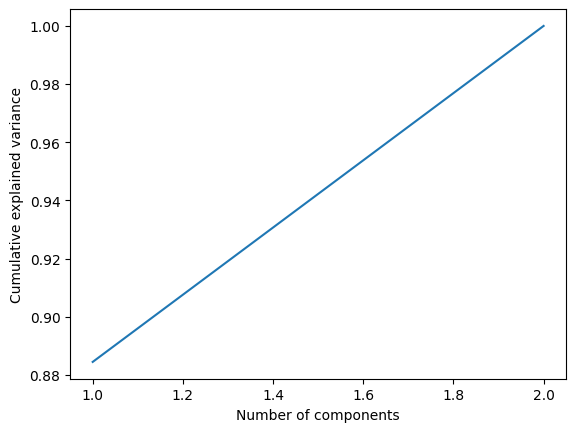

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(
    n_components=None,
)
X_tr = lda.fit_transform(ttt_X,ttt_y)

n_lda_components = lda.explained_variance_ratio_.shape[0]
plt.plot(range(1, n_lda_components + 1), np.cumsum(lda.explained_variance_ratio_))
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')

Text(0.5, 0, 'Number of components')

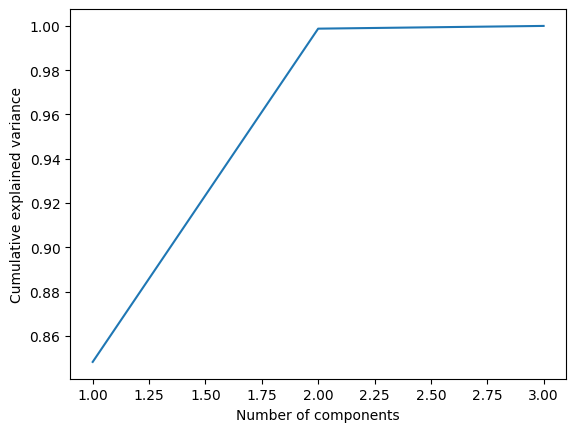

In [ ]:
lda = LDA(
    n_components=None,
)
X_tr = lda.fit_transform(data_encoded,Y)

n_lda_components = lda.explained_variance_ratio_.shape[0]
plt.plot(range(1, n_lda_components + 1), np.cumsum(lda.explained_variance_ratio_))
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')